In [1]:
# Imports
import re

Functions

In [2]:
# Checks
sequence = 'ATGGATG'
rna_sequence = 'RKDKKKDR'

In [8]:
confirm = re.compile('[^ATGC]')

In [11]:
# DNA
def is_dna(sequence):
    confirm = re.compile('[^ATGC]')
    return True if confirm.search(sequence.upper()) == None else False

# RNA
def is_rna(sequence):
    confirm = re.compile('[^A-Z]')
    return True if confirm.search(sequence.upper()) == None else False

# Protein
def is_protein(sequence):
    confirm = re.search(r"[BJOUX|0-9]", sequence.upper())
    return True if confirm.search(sequence.upper()) == None else False

# Charge
def protein_charge(rna_sequence):
    rna_sequence = rna_sequence.upper()
    return (rna_sequence.count('R') + rna_sequence.count('K')) - (rna_sequence.count('D') + rna_sequence.count('E'))

# Restriction_enzyme
def check_restriction_enzyme(restriction_site, sequence):
    if restriction_site in sequence:
        print("REase at position %3d", sequence.find(restriction_site))
        return True
    else:
        return False
    
# GC content
def perc_gc_content(sequence):
    sequence = sequence.upper()
    #print(format((sequence.count("G") + sequence.count("C")) / 100, ",.2f"), "%",sep="")
    return format((sequence.count("G") + sequence.count("C")) / 100, ",.2f")

# DNA to protein
def dna_to_protein(sequence):
    sequence = sequence.lower()
    code = {'ttt': 'F', 'tct': 'S', 'tat': 'Y', 'tgt': 'C',
            'ttc': 'F', 'tcc': 'S', 'tac': 'Y', 'tgc': 'C',
            'tta': 'L', 'tca': 'S', 'taa': '*', 'tga': '*',
            'ttg': 'L', 'tcg': 'S', 'tag': '*', 'tgg': 'W',
            'ctt': 'L', 'cct': 'P', 'cat': 'H', 'cgt': 'R',
            'ctc': 'L', 'ccc': 'P', 'cac': 'H', 'cgc': 'R',
            'cta': 'L', 'cca': 'P', 'caa': 'Q', 'cga': 'R',
            'ctg': 'L', 'ccg': 'P', 'cag': 'Q', 'cgg': 'R',
            'att': 'I', 'act': 'T', 'aat': 'N', 'agt': 'S',
            'atc': 'I', 'acc': 'T', 'aac': 'N', 'agc': 'S',
            'ata': 'I', 'aca': 'T', 'aaa': 'K', 'aga': 'R',
            'atg': 'M', 'acg': 'T', 'aag': 'K', 'agg': 'R',
            'gtt': 'V', 'gct': 'A', 'gat': 'D', 'ggt': 'G',
            'gtc': 'V', 'gcc': 'A', 'gac': 'D', 'ggc': 'G',
            'gta': 'V', 'gca': 'A', 'gaa': 'E', 'gga': 'G',
            'gtg': 'V', 'gcg': 'A', 'gag': 'E', 'ggg': 'G'
            }
    amino = []
    for index in range(0, len(sequence), 3):
        amino.append(sequence[index:index+3])
    return ''.join(amino)

In [10]:
print(protein_charge(rna_sequence))
print(is_dna(sequence))
print(is_rna(sequence))

4
True
True


## Open files

In [122]:
# Opens gff3 file and returns list of info
def open_gff3(filename="Caenorhabditis_elegans.gff3"):
    with open(filename, "r") as gff_file:
        info = []
        file = gff_file.readlines()
        for line in file:
            info.append(line.split("\t"))
    return info

# Opens fasta file and returns 3 list (headers, sequenctie, names)
def open_fasta(filename="Caenorhabditis_elegans.cds_pep.all.fa"):
    with open(filename, "r") as fasta_file:
        headers = []
        seq = []
        lines = []
        bestand = fasta_file.readlines()
        names = []
        for line in bestand:
            if line[0] == ">" and headers == []:
                headers.append(line)
                regel = line.strip(">").split(" ")
                names.append(regel[0])
            elif line[0] == ">":
                seq.append("".join(lines).strip("\n"))
                headers.append(line)
                regel = line.strip(">").split(" ")
                names.append(regel[0])
                lines = []
            else:
                lines.append(line)
        seq.append("".join(lines))
    return headers, seq, names

# Opens expression file (type csv) returns list with gen ID's and their gen expression?
def open_expressionfile_csv(filename="bestanden/SC_expression.csv"):
    with open(filename, 'r') as file:
        lijst = file.readlines()
        gen_expression = []
        gen_id = []
        lijst.pop(0)
        for line in lijst:
            line = line.split(",")
            gen_expression.append(float(line[1]))
            gen_id.append(line[0])
    return(gen_expression, gen_id)

# Open aligment xml
def open_aligment_xml(filename="Alignment.xml"):
    with open(filename,'r') as results:
        result = open(filename, "r")
        records = NCBIXML.parse(result)
        item = next(records)
        for alignment in item.alignments:
            for hsp in alignment.hsps:
                if hsp.expect < 0.00001:
                    print('\n****HIT****')
                    print('sequence:', alignment.title)
                    print('e value:', hsp.expect)
                    print('score:', hsp.score)
                    print('ident_num:',hsp.identities)
                    print('definition:',alignment.hit_def)
                    print('id:',alignment.hit_id)
                    print('Accession:',alignment.accession)

In [69]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import numpy as np

# Codon dict, count codon bias, count amino acids
def get_codons_from_dna():
   return {'ttt': 'F', 'tct': 'S', 'tat': 'Y', 'tgt': 'C',
                  'ttc': 'F', 'tcc': 'S', 'tac': 'Y', 'tgc': 'C',
                  'tta': 'L', 'tca': 'S', 'taa': 'X', 'tga': 'X',
                  'ttg': 'L', 'tcg': 'S', 'tag': 'X', 'tgg': 'W',
                  'ctt': 'L', 'cct': 'P', 'cat': 'H', 'cgt': 'R',
                  'ctc': 'L', 'ccc': 'P', 'cac': 'H', 'cgc': 'R',
                  'cta': 'L', 'cca': 'P', 'caa': 'Q', 'cga': 'R',
                  'ctg': 'L', 'ccg': 'P', 'cag': 'Q', 'cgg': 'R',
                  'att': 'I', 'act': 'T', 'aat': 'N', 'agt': 'S',
                  'atc': 'I', 'acc': 'T', 'aac': 'N', 'agc': 'S',
                  'ata': 'I', 'aca': 'T', 'aaa': 'K', 'aga': 'R',
                  'atg': 'M', 'acg': 'T', 'aag': 'K', 'agg': 'R',
                  'gtt': 'V', 'gct': 'A', 'gat': 'D', 'ggt': 'G',
                  'gtc': 'V', 'gcc': 'A', 'gac': 'D', 'ggc': 'G',
                  'gta': 'V', 'gca': 'A', 'gaa': 'E', 'gga': 'G',
                  'gtg': 'V', 'gcg': 'A', 'gag': 'E', 'ggg': 'G',
                  }

def count_codons(sequence):
    sequence = sequence.lower()
    codon_code_count = dict(ttt=0, tct=0, tat=0, tgt=0, ttc=0, tcc=0,
                            tac=0, tgc=0, tta=0, tca=0, taa=0, tga=0,
                            ttg=0, tcg=0, tag=0, tgg=0, ctt=0, cct=0,
                            cat=0, cgt=0, ctc=0, ccc=0, cac=0, cgc=0,
                            cta=0, cca=0, caa=0, cga=0, ctg=0, ccg=0,
                            cag=0, cgg=0, att=0, act=0, aat=0, agt=0,
                            atc=0, acc=0, aac=0, ata=0, agc=0, aca=0,
                            aaa=0, aga=0, atg=0, acg=0, aag=0, agg=0,
                            gtt=0, gct=0, gat=0, ggt=0, gtc=0, gcc=0,
                            gac=0, ggc=0, gta=0, gca=0, gaa=0, gga=0,
                            gtg=0, gcg=0, gag=0, ggg=0,
                            )
    for index in range(0, len(sequence), 3):
        codon_code_count[sequence[index:index+3]] += 1
    return codon_code_count
    
def count_amino_acids(sequence):
    sequence = sequence.lower()
    codons = get_codons_from_dna()
    amino_acid_count = dict(F=0, L=0, I=0, M=0, V=0, S=0, P=0, T=0, A=0,
                            Y=0, X=0, H=0, Q=0, N=0, K=0, D=0, E=0, C=0,
                            W=0, R=0, G=0,
                            )
    for index in range(0, len(sequence), 3):
        amino_acid_count[codons[sequence[index:index+3]]] += 1
    return amino_acid_count

# visualise count/bias
from Bio.Blast import NCBIXML
def graph_count(value, counts, label_x = "codons"):
    plt.figure(num=1, figsize=(15, 10))
    plt.bar(value, counts, color="darkgreen")
    plt.ylabel("total")
    plt.xlabel(label_x)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(np.arange(0, max(counts)+1, 1)) 
    plt.title("Counts per "+label_x)
    plt.show()

In [13]:
# Biopython
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW, NCBIXML

def transcribe(sequence):
    seq = Seq(sequence)
    return seq.transcribe()

def translate(sequence):
    seq = Seq(sequence)
    return seq.translate()

def transcribe_and_translate(sequence):
    seq = Seq(sequence)
    return seq.transcribe().translate()

def blast(sequence): #nog checken
    result_handle = NCBIWWW.qblast("blastp", "nr", str(sequence))
    blast_record = NCBIXML.read(result_handle)
    alignment = blast_record.alignments
    regels = str(alignment[0].title).replace(">", "|").split("|")
    regel = regels[2].split("[")
    protein = regel[0]
    zin = "The protein:" + str(protein)

In [16]:
import mysql.connector

conn = mysql.connector.connect(
    host="ensembldb.ensembl.org",
    user="anonymous",
    database="homo_sapiens_core_95_38"
)

def search(search_word="kinase"):
    cursor = conn.cursor()
    cursor.execute('''select description from gene where description like '%{}%\'limit 10'''.format(search_word))
    row = cursor.fetchall()
    regels = []
    for item in list(row):
        regel = str(item).strip("'()''")
        regels.append(regel[0:len(regel)-2])
    return regels

In [17]:
search("kinase")

['FGR proto-oncogene, Src family tyrosine kinase [Source:HGNC Symbol;Acc:HGNC:3697]',
 'pyruvate dehydrogenase kinase, isoenzyme 1 (PDK1) pseudogene',
 'phosphomevalonate kinase [Source:HGNC Symbol;Acc:HGNC:9141]',
 'unc-51 like autophagy activating kinase 1 [Source:HGNC Symbol;Acc:HGNC:12558]',
 'mitogen-activated protein kinase kinase 6 [Source:HGNC Symbol;Acc:HGNC:6846]',
 'BR serine/threonine kinase 1 [Source:HGNC Symbol;Acc:HGNC:18994]',
 'FAST kinase domains 3 [Source:HGNC Symbol;Acc:HGNC:28758]',
 'CDC28 protein kinase regulatory subunit 1B pseudogene 1 [Source:HGNC Symbol;Acc:HGNC:20004]',
 'protein kinase interferon-inducible double stranded RNA dependent activator (PRKRA) pseudogene',
 'microtubule associated serine/threonine kinase 2 [Source:HGNC Symbol;Acc:HGNC:19035]']

In [ ]:
def blast_search(zoek, orga, keuze_2):
    """ Vult de query en voert deze uit

    :return:list -lijst met de outpute van de query
    """
    if orga == "All":
        orga = ""
    else:
        orga = "where " + keuze_2 + " like '%" + orga + "%'"
    # orga = "Gemmatimonadetes bacterium"
    # keuze_2 = "organisme"
    cursor = conn.cursor()
    sql = f"select {zoek} from blast " \
          f"join taxonomy t on blast.taxonomy_tax_id = t.tax_id " \
          f"join fragment f on f.read_id = blast.fragment_read_id " \
          f"{orga}" \
          f"order by organisme"
    #sql = f"select {zoek} from blast where {keuze_2} like '%{orga}%'"
    cursor.execute(sql)
    row = cursor.fetchall()
    regels = []
    for item in list(row):
        #regel = str(item).strip("'()''").replace(",", " ").replace("'", "")
        #regels.append(regel[0:len(regel)])
        regels.append(item)
    conn.commit()
    return regels

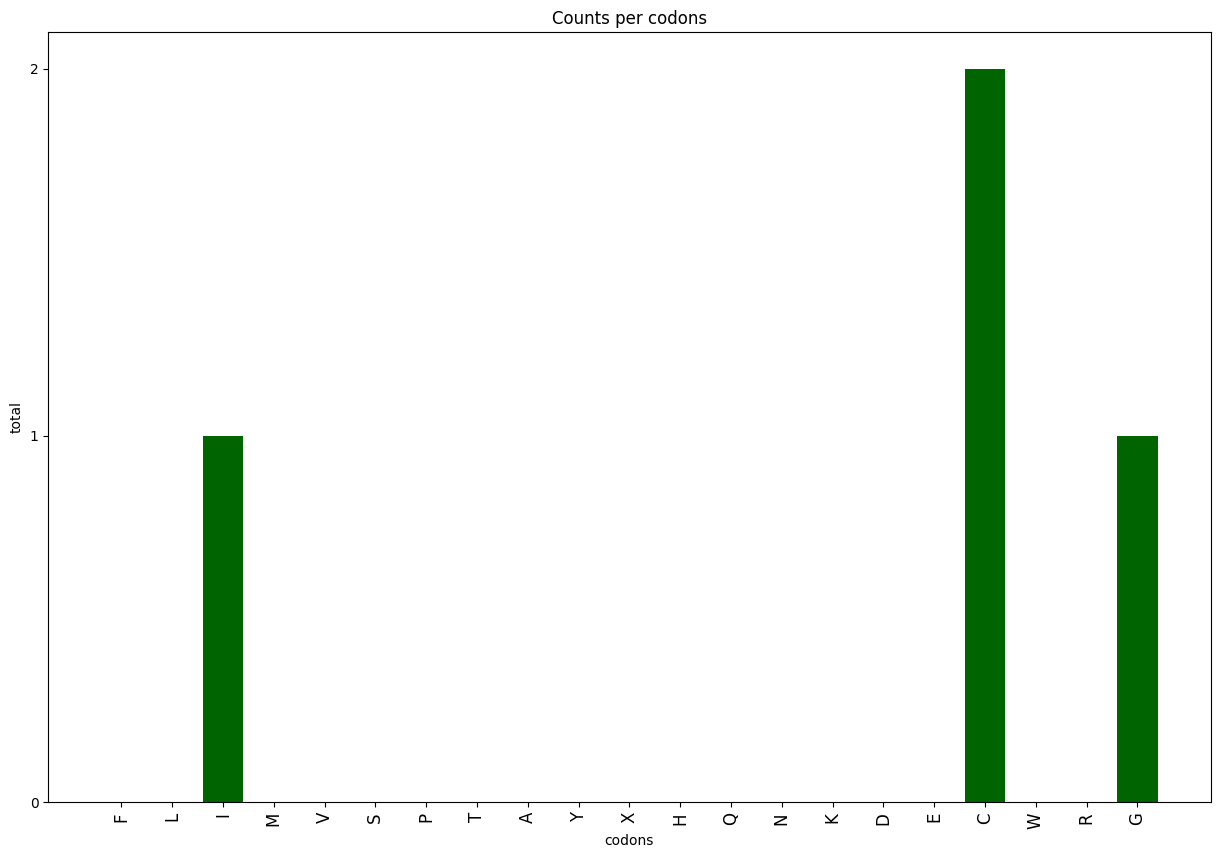

In [85]:
test = count_amino_acids("atttgtggatgt")
value = test.keys()
counts = test.values()
graph_count(value, counts)